In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [8]:
training_data=pd.read_csv('/Users/ellaalmoite/Documents/Ericson_Files/Python_practice/machine_learning/training_data.csv')
testing_data=pd.read_csv('/Users/ellaalmoite/Documents/Ericson_Files/Python_practice/machine_learning/testing_data.csv')

In [7]:
training_data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2011,HONDA,ACCORD 4DR SEDAN,FULL-SIZE,3.5,6,A5,X,11.7,7.8,9.9,29,228
1,2011,SCION,tC,COMPACT,2.5,4,AS6,X,10.2,7.5,9.0,31,207
2,2011,ROLLS-ROYCE,PHANTOM EWB,FULL-SIZE,6.7,12,A6,Z,20.6,13.4,17.4,16,400
3,2011,CHEVROLET,COLORADO,PICKUP TRUCK - SMALL,2.9,4,A4,X,12.8,9.6,11.3,25,260
4,2011,MAZDA,MAZDA2,COMPACT,1.5,4,M5,X,8.0,6.7,7.4,38,170


In [9]:
testing_data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2011,HONDA,PILOT AWD,SUV,3.5,6,A5,X,14.7,10.7,12.9,22
1,2011,CADILLAC,CTS AWD,MID-SIZE,3.6,6,AS6,X,13.2,8.8,11.2,25
2,2011,DODGE,JOURNEY AWD,SUV,3.6,6,AS6,X,14.6,9.9,12.5,23
3,2011,BMW,323i,COMPACT,2.5,6,M6,Z,12.6,8.2,10.6,27
4,2011,GMC,YUKON,SUV,5.3,8,A6,E,21.5,14.7,18.5,15


In [10]:
training_data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [11]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 759 non-null    int64  
 1   MAKE                      759 non-null    object 
 2   MODEL                     759 non-null    object 
 3   VEHICLECLASS              759 non-null    object 
 4   ENGINESIZE                759 non-null    float64
 5   CYLINDERS                 759 non-null    int64  
 6   TRANSMISSION              759 non-null    object 
 7   FUELTYPE                  759 non-null    object 
 8   FUELCONSUMPTION_CITY      759 non-null    float64
 9   FUELCONSUMPTION_HWY       759 non-null    float64
 10  FUELCONSUMPTION_COMB      759 non-null    float64
 11  FUELCONSUMPTION_COMB_MPG  759 non-null    int64  
 12  CO2EMISSIONS              759 non-null    int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 77.2+ KB


In [13]:
training_data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,759.0,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,2011.0,3.585112,6.068511,14.265876,10.206456,12.439526,24.405797,274.314888
std,0.0,1.383097,1.923483,4.140030,2.801196,3.511612,6.506848,63.647630
min,2011.0,1.000000,2.000000,4.700000,4.900000,4.800000,11.000000,110.000000
25%,2011.0,2.400000,4.000000,11.500000,8.300000,10.100000,20.000000,230.000000
50%,2011.0,3.500000,6.000000,13.400000,9.500000,11.600000,24.000000,265.000000
75%,2011.0,4.700000,8.000000,16.200000,11.500000,14.100000,28.000000,313.000000
max,2011.0,8.000000,16.000000,30.300000,20.400000,25.800000,59.000000,547.000000


In [41]:
x_train = training_data.drop('CO2EMISSIONS',axis=1)
x_test = testing_data

In [16]:
x_train.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2011,HONDA,ACCORD 4DR SEDAN,FULL-SIZE,3.5,6,A5,X,11.7,7.8,9.9,29
1,2011,SCION,tC,COMPACT,2.5,4,AS6,X,10.2,7.5,9.0,31
2,2011,ROLLS-ROYCE,PHANTOM EWB,FULL-SIZE,6.7,12,A6,Z,20.6,13.4,17.4,16
3,2011,CHEVROLET,COLORADO,PICKUP TRUCK - SMALL,2.9,4,A4,X,12.8,9.6,11.3,25
4,2011,MAZDA,MAZDA2,COMPACT,1.5,4,M5,X,8.0,6.7,7.4,38


In [70]:
y_train = training_data.CO2EMISSIONS

In [72]:
y_train.shape

(759,)

In [64]:
training_data['total_fuelconsumption'] = training_data[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']].sum(axis=1)
testing_data['total_fuelconsumption'] = testing_data[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']].sum(axis=1)

In [32]:
training_data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,total_fuelconsumption
0,2011,HONDA,ACCORD 4DR SEDAN,FULL-SIZE,3.5,6,A5,X,11.7,7.8,9.9,29,228,58.4
1,2011,SCION,tC,COMPACT,2.5,4,AS6,X,10.2,7.5,9.0,31,207,57.7
2,2011,ROLLS-ROYCE,PHANTOM EWB,FULL-SIZE,6.7,12,A6,Z,20.6,13.4,17.4,16,400,67.4
3,2011,CHEVROLET,COLORADO,PICKUP TRUCK - SMALL,2.9,4,A4,X,12.8,9.6,11.3,25,260,58.7
4,2011,MAZDA,MAZDA2,COMPACT,1.5,4,M5,X,8.0,6.7,7.4,38,170,60.1


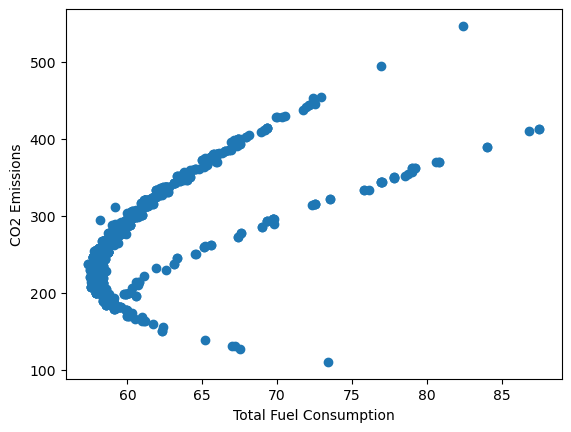

In [38]:
plt.scatter(training_data.total_fuelconsumption,training_data.CO2EMISSIONS)
plt.xlabel('Total Fuel Consumption')
plt.ylabel('CO2 Emissions')
plt.show()

In [52]:
nonint = x_train.select_dtypes(exclude=['int64','float64'])

In [53]:
for col in nonint:
    print(col)
    print(x_train[col].unique())

MAKE
['HONDA' 'SCION' 'ROLLS-ROYCE' 'CHEVROLET' 'MAZDA' 'NISSAN' 'PORSCHE'
 'AUDI' 'DODGE' 'MITSUBISHI' 'BUICK' 'GMC' 'VOLVO' 'ASTON MARTIN' 'JEEP'
 'TOYOTA' 'BMW' 'MINI' 'HYUNDAI' 'MERCEDES-BENZ' 'FORD' 'KIA' 'ACURA'
 'INFINITI' 'LEXUS' 'SUBARU' 'VOLKSWAGEN' 'JAGUAR' 'LAND ROVER' 'SUZUKI'
 'LINCOLN' 'MASERATI' 'CHRYSLER' 'CADILLAC' 'BENTLEY' 'LAMBORGHINI'
 'BUGATTI' 'SMART']
MODEL
['ACCORD 4DR SEDAN' 'tC' 'PHANTOM EWB' 'COLORADO' 'MAZDA2' 'ALTIMA' 'CX-9'
 '911 CARRERA 4 CABRIOLET' 'S4' 'CALIBER' '911 TURBO S CABRIOLET' 'RVR'
 'LACROSSE AWD' 'SIERRA 4WD' 'SILVERADO HYBRID' 'S60 T6 AWD' 'V8 VANTAGE'
 'COMPASS 4X4' 'COROLLA MATRIX' 'EXPRESS PASSENGER AWD' 'X5 M'
 'COOPER CLUBMAN' 'S80 3.2' 'ACCENT' 'CL 63 AMG' 'SIERRA' 'JUKE' 'DBS'
 'RANGER' 'CHARGER FFV' '911 GTS' 'C 350 4MATIC' 'PATRIOT 4X4'
 'PANAMERA S' 'ELEMENT AWD' 'SAVANA 3500 PASSENGER' '335is COUPE' 'C30 T5'
 'ECLIPSE' 'CANYON CREW CAB 4WD' 'TAURUS' 'COROLLA' 'SAVANA CARGO CONV'
 'GRAND CHEROKEE 4X4 (FuelSaver MDS)' '911 CARRERA

In [54]:
label_encoder = LabelEncoder()

In [55]:
for col in nonint:
    x_train[col]=label_encoder.fit_transform(x_train[col])

In [56]:
x_train.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,total_fuelconsumption
0,2011,13,61,1,3.5,6,1,2,11.7,7.8,9.9,29,58.4
1,2011,31,499,0,2.5,4,9,2,10.2,7.5,9.0,31,57.7
2,2011,30,336,1,6.7,12,2,3,20.6,13.4,17.4,16,67.4
3,2011,8,112,5,2.9,4,0,2,12.8,9.6,11.3,25,58.7
4,2011,24,302,0,1.5,4,13,2,8.0,6.7,7.4,38,60.1


In [57]:
nonint_test = x_test.select_dtypes(exclude=['int64','float64'])

In [58]:
for col in nonint_test:
    print(col)
    print(x_test[col].unique())

MAKE
['HONDA' 'CADILLAC' 'DODGE' 'BMW' 'GMC' 'CHRYSLER' 'VOLVO' 'AUDI' 'ACURA'
 'FORD' 'MERCEDES-BENZ' 'TOYOTA' 'MASERATI' 'LAND ROVER' 'CHEVROLET' 'KIA'
 'VOLKSWAGEN' 'PORSCHE' 'NISSAN' 'MITSUBISHI' 'MAZDA' 'HYUNDAI' 'INFINITI'
 'LEXUS' 'SUBARU' 'BUICK' 'LINCOLN' 'SUZUKI' 'JEEP' 'MINI' 'JAGUAR'
 'BENTLEY' 'LAMBORGHINI']
MODEL
['PILOT AWD' 'CTS AWD' 'JOURNEY AWD' '323i' 'YUKON' '300 FFV'
 'XC90 3.2 AWD' 'A4 QUATTRO' 'CSX' 'FLEX AWD' 'SIERRA 4WD' 'EDGE AWD'
 'S 600' 'TACOMA 4WD' 'B 200' 'GRANTURISMO' 'LR4' 'SILVERADO HYBRID 4WD'
 'EXPRESS CARGO CONV AWD' 'SOUL' 'JETTA TDI (modified)' 'DURANGO AWD FFV'
 'CAYENNE TURBO' 'CANYON 4WD' 'FUSION' 'FUSION S' '200 CONVERTIBLE FFV'
 '370Z' 'COLORADO CREW CAB' 'SUBURBAN 4WD' 'LANCER EVOLUTION' 'FORTE KOUP'
 'AVENGER FFV' 'RAV4' 'SAVANA PASSENGER' 'MAZDA6' 'E150 WAGON FFV'
 'SL 550' 'EOS' 'ESCALADE ESV AWD' 'S 65 AMG' 'CAYENNE S HYBRID'
 'RANGER 4X4' 'TAHOE 4WD' 'X5 xDRIVE35i' 'ECLIPSE' 'ROUTAN FFV'
 'CHARGER AWD (FuelSaver MDS)' 'F150 FFV' 'GOLF W

In [59]:
for col in nonint_test:
    x_test[col]=label_encoder.fit_transform(x_test[col])

In [61]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [65]:
y_pred = regressor.predict(x_test)

In [66]:
y_pred

array([282.00083198, 250.0624847 , 271.12361801, 242.37402627,
       345.55062312, 288.19405845, 283.93401568, 212.70808934,
       199.55533263, 276.95349706, 342.16323557, 262.9879158 ,
       378.24222979, 293.93953167, 228.81870707, 344.64448583,
       360.45524085, 277.92795183, 384.77761863, 193.0904814 ,
       131.45637672, 308.53677127, 325.90092362, 274.35461783,
       201.56458882, 204.05217876, 268.53007793, 277.0393603 ,
       244.7295849 , 316.48016794, 268.29930582, 181.30683695,
       240.06037704, 260.20131014, 376.40321509, 261.71878971,
       343.43857702, 346.27111598, 234.5583035 , 381.4317684 ,
       376.76088425, 266.85799135, 303.36915964, 344.16916529,
       287.72872932, 290.92734214, 265.56331601, 302.34396339,
       301.26322996, 142.60245159, 304.63798068, 375.09487559,
       273.19075805, 264.82097906, 192.68050623, 296.31085087,
       220.4503792 , 238.03232441, 178.08382897, 292.62745747,
       280.3917253 , 304.03936056, 244.77843476, 215.72

In [73]:
x_train.shape

(759, 13)

In [74]:
y_train.shape

(759,)

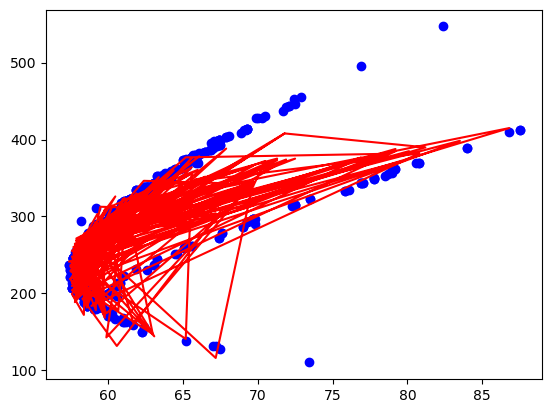

In [77]:
plt.scatter(x_train.total_fuelconsumption, y_train, color='blue')
plt.plot(x_test.total_fuelconsumption,y_pred,color='red')
plt.show()

In [76]:
x_train.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,total_fuelconsumption
0,2011,13,61,1,3.5,6,1,2,11.7,7.8,9.9,29,58.4
1,2011,31,499,0,2.5,4,9,2,10.2,7.5,9.0,31,57.7
2,2011,30,336,1,6.7,12,2,3,20.6,13.4,17.4,16,67.4
3,2011,8,112,5,2.9,4,0,2,12.8,9.6,11.3,25,58.7
4,2011,24,302,0,1.5,4,13,2,8.0,6.7,7.4,38,60.1
